### Leisure-Time Physical Activity by Age Group
#### RKI Dataset

In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv('../datasets/Gesundheit_in_Deutschland_aktuell_-_2019-2020-EHIS.csv')

data.head()

,Altersgruppe,Bildungsgruppe,Gender,Frequency,Freq_ges,Percent,LowerCL,UpperCL,Bundesland,Standard,Variable,BundeslandId
0,18 - 29 Jahre,Gesamt,Frauen,302,899,36.902,32.817,41.184,Deutschland,0,AMarztB,0
1,18 - 29 Jahre,Gesamt,Gesamt,561,2100,28.312,25.793,30.974,Deutschland,0,AMarztB,0
2,18 - 29 Jahre,Gesamt,Männer,254,1188,20.697,17.841,23.878,Deutschland,0,AMarztB,0
3,30 - 44 Jahre,Gesamt,Frauen,720,1895,38.012,34.983,41.136,Deutschland,0,AMarztB,0
4,30 - 44 Jahre,Gesamt,Gesamt,1229,3768,34.433,32.281,36.650,Deutschland,0,AMarztB,0


In [2]:
# Filter the data for physical activity variable
df = data[data['Variable'] == 'KAgfkaB']

# Filter out the 'Gesamt' group and select only total gender
df = df[df['Altersgruppe'] != 'Gesamt']

# Only select the 'Gesamt' group for gender
df = df[df['Gender'] == 'Gesamt']

# Sample the data to verify the structure
df.head(10)

,Altersgruppe,Bildungsgruppe,Gender,Frequency,Freq_ges,Percent,LowerCL,UpperCL,Bundesland,Standard,Variable,BundeslandId
3519,18 - 29 Jahre,Gesamt,Gesamt,1389,2093,64.586,61.796,67.281,Deutschland,0,KAgfkaB,0
3522,30 - 44 Jahre,Gesamt,Gesamt,1975,3736,49.871,47.585,52.158,Deutschland,0,KAgfkaB,0
3525,45 - 64 Jahre,Gesamt,Gesamt,4693,8887,46.750,45.208,48.297,Deutschland,0,KAgfkaB,0
3528,65 + Jahre,Gesamt,Gesamt,3511,7727,37.373,35.740,39.037,Deutschland,0,KAgfkaB,0


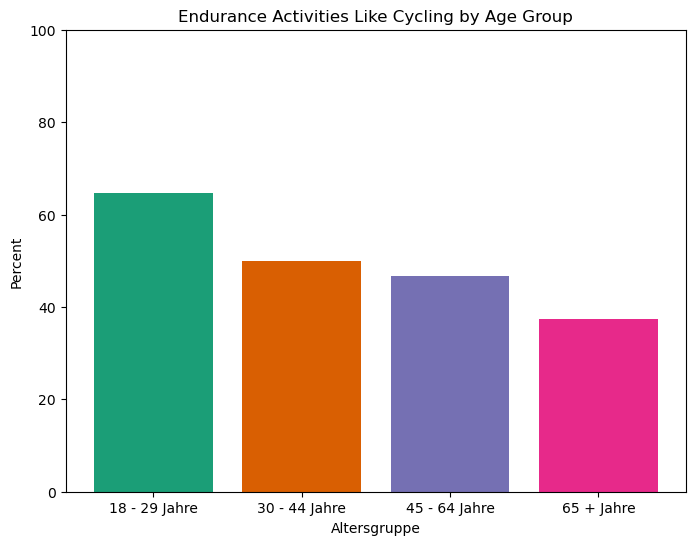

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # Import Seaborn for the palette

# Prepare data for plotting
age_group = df['Altersgruppe']
percent = df['Percent']

# Get colors from Seaborn's 'Dark2' palette
colors = sns.color_palette('Dark2', n_colors=len(age_group))  # Ensure there are enough colors

# Create a figure and an axes object
fig, ax = plt.subplots(figsize=(8, 6))

# Plotting using the axes object
ax.bar(age_group, percent, color=colors)
ax.set_ylim(0, 100)  # Set y-axis limits

# Add labels using the axes object
ax.set_xlabel('Altersgruppe')
ax.set_ylabel('Percent')
ax.set_title('Endurance Activities Like Cycling by Age Group')

# Save and show the figure
fig.savefig('06_chart.png')
plt.show()


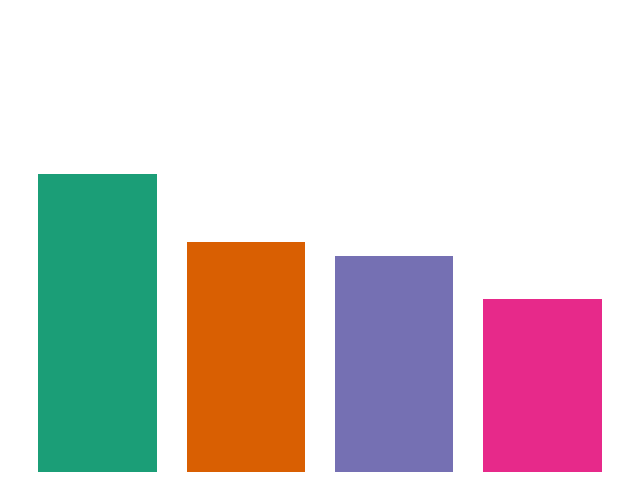

In [4]:
# Remove axes ticks and labels
fig.gca().axes.get_yaxis().set_visible(False)
fig.gca().axes.get_xaxis().set_visible(False)

# Remove spines
fig.gca().spines['top'].set_visible(False)
fig.gca().spines['right'].set_visible(False)
fig.gca().spines['bottom'].set_visible(False)
fig.gca().spines['left'].set_visible(False)

# Remove title
fig.gca().title.set_visible(False)

fig.savefig('06_bare_chart.png')

fig

### Creating a mask for the chart

In [5]:
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

def create_rectangular_mask(input_image_path, radius=5):
    # Load the image
    image = Image.open(input_image_path)
    image = image.convert("RGBA")  # Ensure image is in RGBA format to check for white pixels

    # Create a blank mask image with the same dimensions as the input image
    mask = Image.new('L', image.size, color=0)  # 'L' mode for black and white (luminance)
    draw = ImageDraw.Draw(mask)

    # Iterate over each pixel in the image
    for x in range(image.width):
        for y in range(image.height):
            r, g, b, a = image.getpixel((x, y))
            # Check if the pixel is not white; consider it non-white if any of the RGB values are not 255
            if r != 255 or g != 255 or b != 255:
                # Draw a circle of the specified radius around the non-white pixel
                draw.rectangle((x-radius, y-radius, x+radius, y+radius), fill=255)

    return image, mask


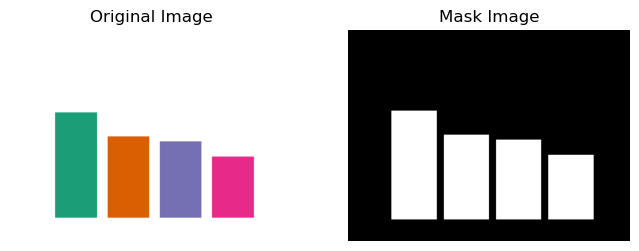

In [6]:
# Example usage
input_image_path = '06_bare_chart.png'
original_image, mask_image = create_rectangular_mask(input_image_path,5)

# Display the original image and the mask side by side
fig, ax = plt.subplots(1, 2, figsize=(8, 6))
ax[0].imshow(original_image)
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(mask_image, cmap='gray')
ax[1].set_title('Mask Image')
ax[1].axis('off')
plt.imsave('06_mask_chart.png', mask_image, cmap='gray')